In [1]:
# System related libraries
import os
import datetime
# Handle table-like data and matrices
import numpy as np
import pandas as pd
# keras libraries
import keras
import tensorflow as tf
from keras import optimizers
from keras.layers import *
from keras.regularizers import l2
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, Callback, LearningRateScheduler
# sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Visualization libraries
import matplotlib.pyplot as plt
# %tensorflow_version only exists in Colab.
%tensorflow_version 2.x

%load_ext tensorboard
# Clear any logs from previous runs
!rm -rf ./logs/
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cifar = tf.keras.datasets.cifar100

(x_train, y_train), (x_test, y_test) = cifar.load_data()

169009152/169001437 [==============================] - 6s 0us/step


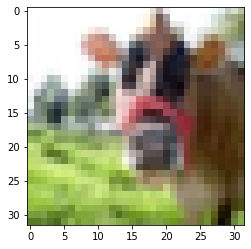

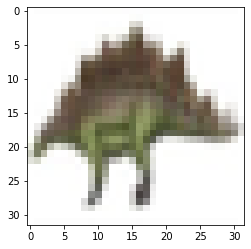

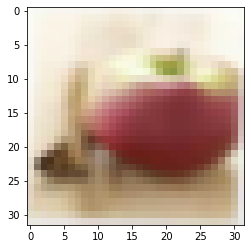

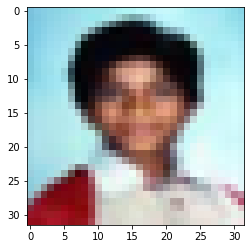

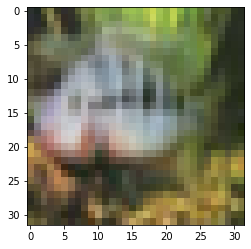

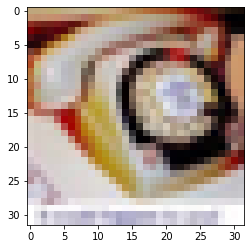

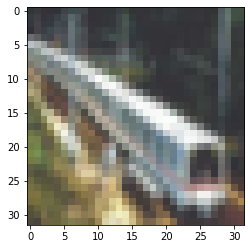

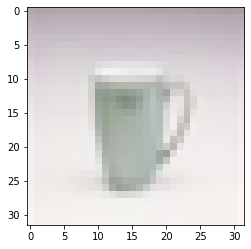

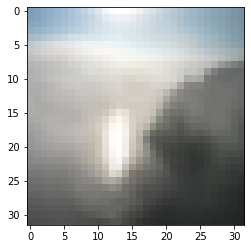

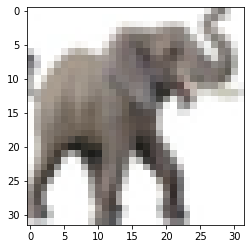

In [4]:
# Before preprocessing the dataset with VGG16 network, checking the data
for i in range(10):
    img = x_train[i].reshape(32,32,3)
    plt.imshow(img)
    plt.show()

In [0]:
# returns normalized training set and test set according to the trianing set statistics.
def normalize(x_train,x_test):
        mean = np.mean(x_train,axis=(0,1,2,3))
        std = np.std(x_train, axis=(0, 1, 2, 3))
        print(mean)
        print(std)
        x_train = (x_train-mean)/(std+1e-7)
        x_test = (x_test-mean)/(std+1e-7)
        return x_train, x_test

In [6]:
#Convert the inputs to float dtype
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Normalize the inputs
x_train, x_test = normalize(x_train, x_test)
target_classes = 100
#Convert the categorical values to One-Hot Encoded
y_train = to_categorical(y_train, target_classes)
y_test = to_categorical(y_test, target_classes)

121.93584
68.38902


In [0]:

def lr_scheduler(epoch):
  return learning_rate * (0.5 ** (epoch // lr_drop))
reduce_lr = LearningRateScheduler(lr_scheduler)

In [0]:
# This is the augmentation configuration we will use for training
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images
datagen.fit(x_train)

In [0]:
weight_decay = 0.0005
input_shape = (32,32,3)
batch_size = 128
epochs = 250
learning_rate = 0.1
lr_decay = 1e-6
lr_drop = 20

In [0]:
model = keras.models.Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=input_shape, kernel_regularizer=l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(target_classes))
model.add(Activation('softmax'))

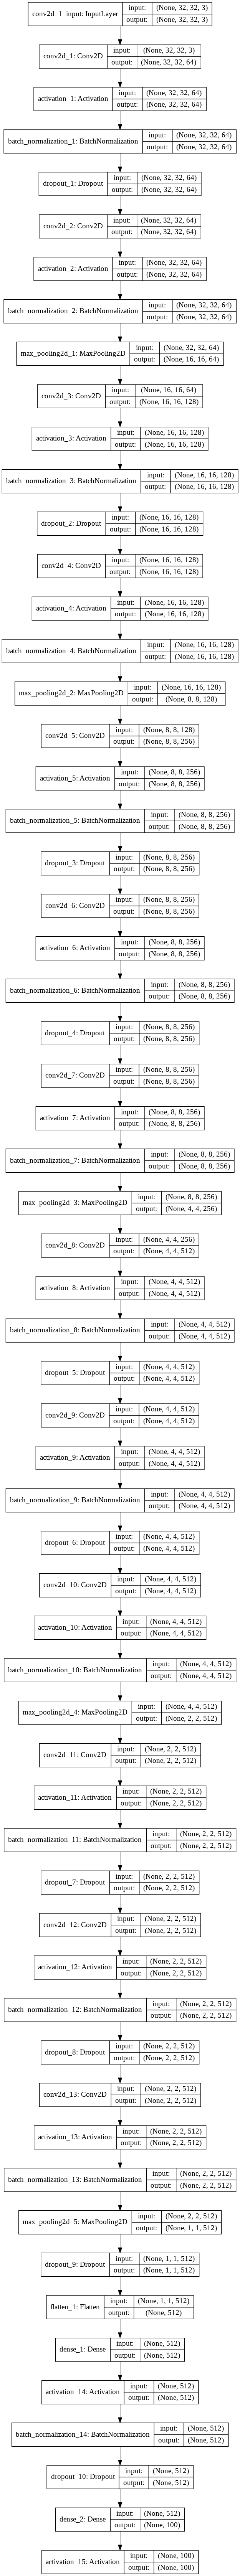

In [11]:
keras.utils.plot_model(model, "vgg16.png", show_shapes=True)

In [0]:
sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [0]:
# Setting checkpoint & early stopping
checkpoint_path = os.path.join('/content/drive/My Drive/CMPE 258/Assignment 4/VGG16','model_best_weights.{epoch:02d}-{accuracy:.4f}.hdf5')
checkpoint = ModelCheckpoint(
    checkpoint_path, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

early_stop = EarlyStopping(monitor='accuracy', patience=5, mode='max')
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
callbacks_list = [checkpoint, tensorboard_callback, reduce_lr]

In [14]:
history = model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                            steps_per_epoch=x_train.shape[0] // batch_size,
                            epochs=epochs,
                            validation_data=(x_test, y_test),callbacks=callbacks_list)

Epoch 1/250
390/390 [==============================] - 58s 149ms/step - loss: 19.0013 - accuracy: 0.0233 - val_loss: 15.6756 - val_accuracy: 0.0119

Epoch 00001: accuracy improved from -inf to 0.02332, saving model to /content/drive/My Drive/CMPE 258/Assignment 4/VGG16/model_best_weights.01-0.0233.hdf5
Epoch 2/250
390/390 [==============================] - 46s 119ms/step - loss: 11.0399 - accuracy: 0.0468 - val_loss: 8.9320 - val_accuracy: 0.0274

Epoch 00002: accuracy improved from 0.02332 to 0.04676, saving model to /content/drive/My Drive/CMPE 258/Assignment 4/VGG16/model_best_weights.02-0.0468.hdf5
Epoch 3/250
390/390 [==============================] - 46s 118ms/step - loss: 7.2567 - accuracy: 0.0616 - val_loss: 6.5914 - val_accuracy: 0.0311

Epoch 00003: accuracy improved from 0.04676 to 0.06162, saving model to /content/drive/My Drive/CMPE 258/Assignment 4/VGG16/model_best_weights.03-0.0616.hdf5
Epoch 4/250
390/390 [==============================] - 46s 119ms/step - loss: 5.5342 

In [0]:
model.save('/content/drive/My Drive/CMPE 258/Assignment 4/VGG16/cifar100vgg.hdf5')
model.save_weights('/content/drive/My Drive/CMPE 258/Assignment 4/VGG16/cifar100vgg.h5')

In [16]:
score = model.evaluate(x_test,y_test)
print("Test Loss: ",score[0])
print("Test Accuracy: ",score[1])

10000/10000 [==============================] - 5s 467us/step
Test Loss:  2.1636759181976317
Test Accuracy:  0.692799985408783


In [17]:
y_pred = model.predict_classes(x_test)
y_pred = to_categorical(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       100
           1       0.92      0.77      0.84       100
           2       0.69      0.63      0.66       100
           3       0.63      0.40      0.49       100
           4       0.47      0.55      0.51       100
           5       0.75      0.68      0.71       100
           6       0.82      0.69      0.75       100
           7       0.73      0.71      0.72       100
           8       0.83      0.89      0.86       100
           9       0.81      0.79      0.80       100
          10       0.55      0.49      0.52       100
          11       0.46      0.45      0.45       100
          12       0.75      0.83      0.79       100
          13       0.73      0.64      0.68       100
          14       0.65      0.74      0.69       100
          15       0.69      0.76      0.72       100
          16       0.64      0.70      0.67       100
          17       0.85    